In [1]:
!pip install graphviz

In [1]:
import json
from graphviz import Digraph
from IPython.display import display


Visualizing the State Machine...


in label of node Dormant
in label of node Ancient Awakening
in label of node Heart Test
in label of node Wisdom Trial
in label of node Revelation of the Wind Gem
in label of node Return to Sleep


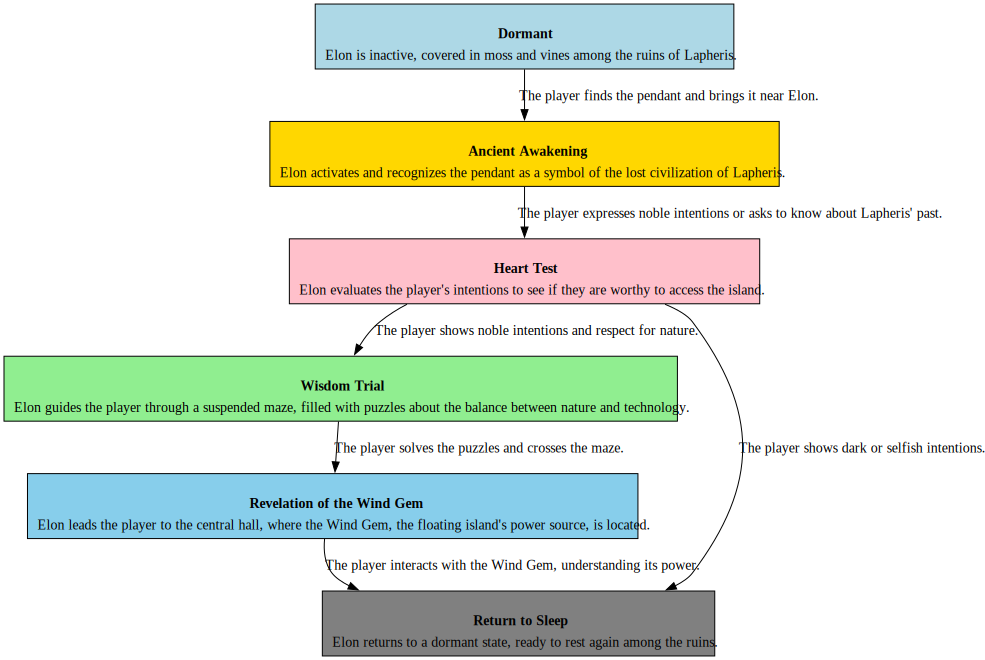


Starting the State Machine Simulation...

--- Entering State: Dormant ---
Description: Elon is inactive, covered in moss and vines among the ruins of Lapheris.
Elon's response: [Silence. The guardian appears as part of the ruins, motionless and ancient.]

Available transitions:
1. The player finds the pendant and brings it near Elon. -> Ancient Awakening

--- Entering State: Ancient Awakening ---
Description: Elon activates and recognizes the pendant as a symbol of the lost civilization of Lapheris.
Elon's response: The light returns to my core... Who dares disturb the silence of Lapheris?

Available transitions:
1. The player expresses noble intentions or asks to know about Lapheris' past. -> Heart Test

--- Entering State: Heart Test ---
Description: Elon evaluates the player's intentions to see if they are worthy to access the island.
Elon's response: I see your heart, mortal. Show me your true nature.

Available transitions:
1. The player shows noble intentions and respect for nat

In [ ]:
# Dizionario degli stili degli stati, con colore e percorso delle icone
state_styles = {
    "Dormant": {"color": "lightblue", "icon": "./icons/dormant.png"},
    "Ancient Awakening": {"color": "gold", "icon": "./icons/awakening.png"},
    "Heart Test": {"color": "pink", "icon": "./icons/test.png"},
    "Wisdom Trial": {"color": "lightgreen", "icon": "./icons/wisdom_trial.png"},
    "Revelation of the Wind Gem": {"color": "skyblue", "icon": "./icons/wind_gem.png"},
    "Return to Sleep": {"color": "gray", "icon": "./icons/return_to_sleep.png"},
}

# Simulazione di generazione di risposte dinamiche (mock)
def simulate_response(state):
    """
    Simula la risposta di Elon in base al prompt dello stato.
    """
    simulated_responses = {
        "Dormant": "[Silence. The guardian appears as part of the ruins, motionless and ancient.]",
        "Ancient Awakening": "The light returns to my core... Who dares disturb the silence of Lapheris?",
        "Heart Test": "I see your heart, mortal. Show me your true nature.",
        "Wisdom Trial": "The path forward demands understanding. Solve the riddle, and prove yourself worthy.",
        "Revelation of the Wind Gem": "Behold, the Wind Gem—the heart of Lapheris. Touch it with reverence.",
        "Return to Sleep": "My purpose is fulfilled. Until I am needed again… I rest."
    }
    return simulated_responses.get(state["name"], "Elon remains silent.")

# Funzione per visualizzare la macchina a stati con icone
def visualize_state_machine(data):
    """
    Genera una rappresentazione grafica della macchina a stati con icone.
    """
    dot = Digraph(comment=data["character"])

    # Aggiunge i nodi per ciascuno stato
    for state in data["states"]:
        name = state["name"]
        description = state["description"]

        # Recupera lo stile dallo stato
        style = state_styles.get(name, {"color": "white", "icon": None})
        fillcolor = style["color"]
        icon_path = style["icon"]

        # Etichetta del nodo con icona
        if icon_path:
            label = f'<<table border="0" cellborder="0" cellspacing="0">' \
                    f'<tr><td align="center"><img src="{icon_path}" width="48"/></td></tr>' \
                    f'<tr><td align="center"><b>{name}</b></td></tr>' \
                    f'<tr><td align="center">{description}</td></tr></table>>'
        else:
            # Se non c'è un'icona, usa solo il testo
            label = f'<<table border="0" cellborder="0" cellspacing="0">' \
                    f'<tr><td align="center"><b>{name}</b></td></tr>' \
                    f'<tr><td align="center">{description}</td></tr></table>>'

        dot.node(name, label=label, shape="rect", style="filled", fillcolor=fillcolor)

    # Aggiunge le transizioni con condizioni
    for state in data["states"]:
        name = state["name"]
        for transition in state["transitions"]:
            condition = transition["condition"]
            next_state = transition["next_state"]
            dot.edge(name, next_state, label=condition)

    display(dot)

# Funzione per simulare il flusso della macchina a stati
def simulate_state_machine(data):
    """
    Simula il comportamento dell'agente attraverso gli stati, gestendo le transizioni.
    """
    states = {state["name"]: state for state in data["states"]}  # Indice degli stati
    current_state = states.get("Dormant")  # Stato iniziale

    while current_state:
        print(f"\n--- Entering State: {current_state['name']} ---")
        print(f"Description: {current_state['description']}")
        
        # Genera la risposta dell'agente per lo stato corrente
        response = simulate_response(current_state)
        print(f"Elon's response: {response}")

        # Mostra le transizioni disponibili
        if not current_state["transitions"]:
            print("No more transitions. Elon rests.")
            break

        print("\nAvailable transitions:")
        for i, transition in enumerate(current_state["transitions"], 1):
            print(f"{i}. {transition['condition']} -> {transition['next_state']}")

        # Permetti all'utente di scegliere una transizione
        choice = input("Choose a transition (enter number): ")
        try:
            chosen_transition = current_state["transitions"][int(choice) - 1]
            next_state_name = chosen_transition["next_state"]
            current_state = states.get(next_state_name)
        except (IndexError, ValueError):
            print("Invalid choice. Please try again.")
            continue

# Carica il file JSON degli stati
def load_dfa_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        return data
    except json.JSONDecodeError as e:
        print("Error: Invalid JSON format.")
        return None
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None

# Esecuzione
file_path = 'elon_states.json'
data = load_dfa_from_file(file_path)
if data:
    print("\nVisualizing the State Machine...")
    visualize_state_machine(data)
    print("\nStarting the State Machine Simulation...")
    simulate_state_machine(data)
